In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [6]:
# Step 1: Data Audit & Cleaning
# In clinical data, missing values aren't just empty cells; they represent tests that weren't performed. 
# Also, we must ensure numbers are treated as numbers, not text.

import pandas as pd
import numpy as np

# 1. Combine features and target for easier cleaning
df = pd.concat([X, y], axis=1)

# 2. Fix the '?' issue
# The UCI dataset often uses '?' for unknown values. 
# We replace them with 'NaN' (Not a Number) so Python recognizes them as missing.
df = df.replace('?', np.nan)

# 3. Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# 4. Handle missing values
# Since this is a small dataset for a portfolio, we will drop rows with missing values 
# to keep our analysis "clean" and accurate.
df = df.dropna()

# 5. Simplify the Target
# The 'num' column is 0 (healthy) or 1-4 (disease). 
# Doctors usually want to know: "Does this patient have disease or not?"
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df = df.drop(columns=['num']) # Drop the old column

print("\nData Audit Complete. New Shape:", df.shape)
df.head()

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Data Audit Complete. New Shape: (297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Step 2: The Teacher’s Perspective – Why did we do this?
The Binary Target: By turning the target into 0 (Healthy) and 1 (Disease), we changed this from a 
complex "grading" problem into a Binary Classification problem. 
This is the most common task in medical AI.

The "Clean" Data: In a hospital, a missing value in a "Cholesterol" column might mean the patient 
didn't fast. By dropping those rows for now, we ensure our model learns from complete medical profiles

Step 3: Medical Feature Exploration (EDA)
Now, let's look at the data like a doctor. 
We want to see which features 
actually separate sick people from healthy people.

C:\Users\user\AppData\Local\Temp\ipykernel_21740\3375338203.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='thalach', data=df, palette='Set2')


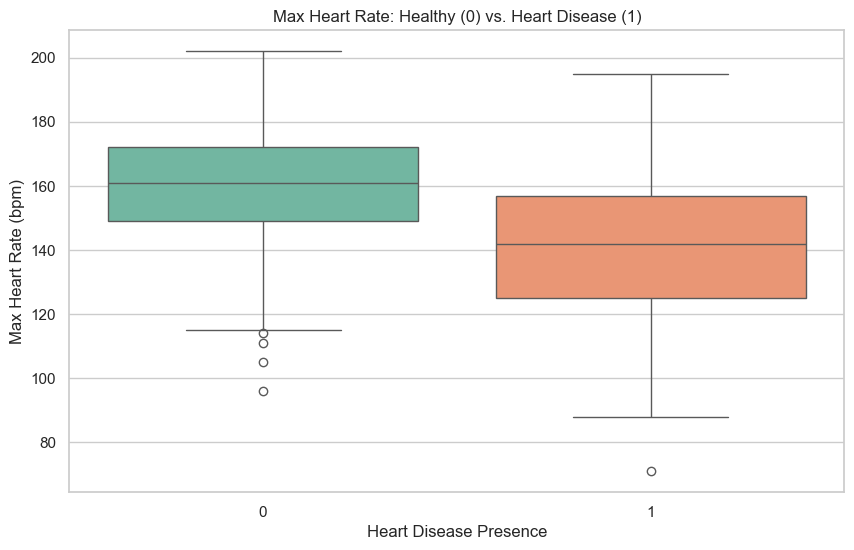

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_theme(style="whitegrid")

# Let's look at 'Thalach' (Maximum Heart Rate Achieved)
# Medical theory: Healthy hearts can usually reach higher speeds during stress tests.
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='thalach', data=df, palette='Set2')
plt.title('Max Heart Rate: Healthy (0) vs. Heart Disease (1)')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Max Heart Rate (bpm)')
plt.show()

What are we looking for here?
If the "Healthy" box is much higher than the "Disease" box, 
it means Max Heart Rate is a very strong predictor

C:\Users\user\AppData\Local\Temp\ipykernel_21740\3467366063.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y='oldpeak', data=df, palette='magma', inner='quartile')


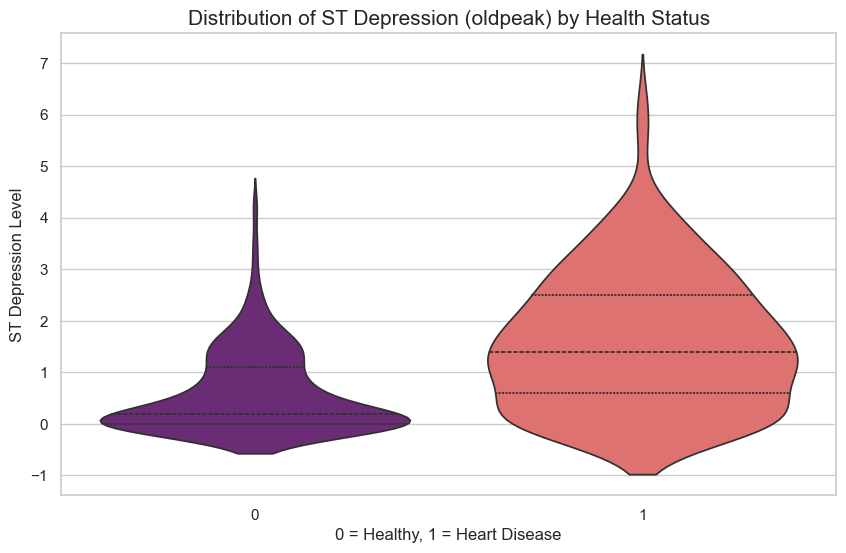

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# We will use a Violin Plot. 
# It's like a Boxplot but shows the "density" or shape of the data too.
plt.figure(figsize=(10, 6))
sns.violinplot(x='target', y='oldpeak', data=df, palette='magma', inner='quartile')

plt.title('Distribution of ST Depression (oldpeak) by Health Status', fontsize=15)
plt.xlabel('0 = Healthy, 1 = Heart Disease', fontsize=12)
plt.ylabel('ST Depression Level', fontsize=12)
plt.show()

What are we seeing?
For Healthy Patients (0): Notice how the "fat" part of the violin is at the very bottom (near 0.0). 
Most healthy people have little to no ST depression.

For Patients with Heart Disease (1): The violin is much taller and more spread out. 
Many patients have values of 2.0, 4.0, or even higher.

The visual analysis confirms medical theory—higher ST depression (oldpeak) 
is strongly associated with the presence of heart disease.

Preparing the Data for Machine Learning
Now that we've explored the data, we have to get it ready for an AI model. Computers are great at math, 
but they don't understand "Chest Pain Type 3."

We need to perform One-Hot Encoding. This turns a categorical column like cp into several columns of 0s and 1s.

In [9]:
# 1. Select categorical columns that need encoding
# Based on the dataset documentation:
cat_columns = ['cp', 'restecg', 'slope', 'thal']

# 2. Use 'get_dummies' to create separate columns for each category
# This prevents the model from thinking 'Category 4' is 'greater' than 'Category 1'
df_encoded = pd.get_dummies(df, columns=cat_columns, drop_first=True)

# 3. Scale the continuous numbers
# Features like 'chol' (200+) and 'oldpeak' (1.5) have very different scales.
# We want to put them all on the same scale (0 to 1 or -1 to 1).
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

print("Data is now encoded and scaled!")
df_encoded.head()

Data is now encoded and scaled!


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_2,cp_3,cp_4,restecg_1,restecg_2,slope_2,slope_3,thal_6.0,thal_7.0
0,0.936181,1,0.750380,-0.276443,1,0.017494,0,1.068965,-0.721976,0,False,False,False,False,True,False,True,True,False
1,1.378929,1,1.596266,0.744555,0,-1.816334,1,0.381773,2.478425,1,False,False,True,False,True,True,False,False,False
2,1.378929,1,-0.659431,-0.353500,0,-0.899420,1,1.326662,1.411625,1,False,False,True,False,True,True,False,False,True
3,-1.941680,1,-0.095506,0.051047,0,1.633010,0,2.099753,-0.721976,0,False,True,False,False,False,False,True,False,False
4,-1.498933,0,-0.095506,-0.835103,0,0.978071,0,0.295874,-0.721976,0,True,False,False,False,True,False,False,False,False


Why "Scale" the data?
Imagine a model trying to predict heart disease. If one number is 250 (Cholesterol) 
and another is 1.5 (Oldpeak), the model might think Cholesterol is "more important" 
just because the number is bigger. Scaling makes sure every feature gets a fair vote.

In the medical world, Logistic Regression is the "gold standard" starting point. 
Unlike more complex "black box" models, Logistic Regression is transparent—it tells 
you exactly how much each risk factor (like age or cholesterol) contributes to the final diagnosis. 
This transparency is crucial for doctors.

In [10]:
# Split your data and train the mode

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# 1. Separate Features (X) and Target (y)
X_final = df_encoded.drop('target', axis=1)
y_final = df_encoded['target']

# 2. Split into Training and Testing sets
# We train on 80% of the data and "test" the model's performance on the other 20%.
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# 3. Initialize and Train the Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Make Predictions
predictions = model.predict(X_test)

print("Model Training Complete!")

Model Training Complete!


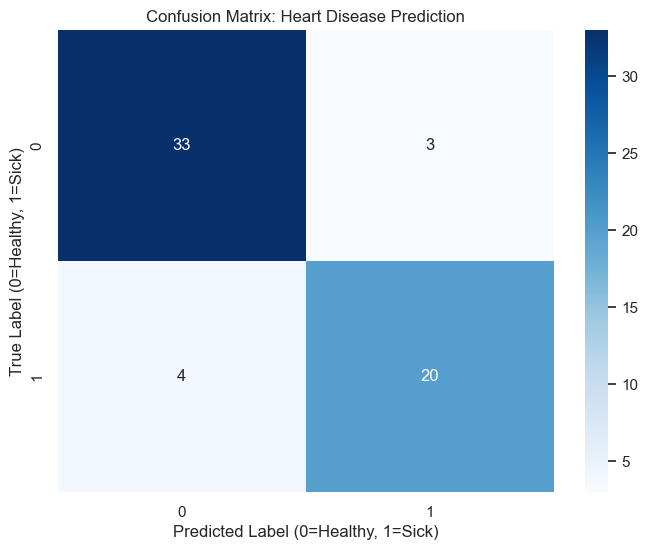

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.87      0.83      0.85        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [11]:
# Step 5: Evaluating the "Medical Accuracy"
# Now, we need to see how well we did. In medicine, Accuracy isn't everything. 
# We care deeply about Recall (how many sick people did we correctly catch?

# Create a Confusion Matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Heart Disease Prediction')
plt.xlabel('Predicted Label (0=Healthy, 1=Sick)')
plt.ylabel('True Label (0=Healthy, 1=Sick)')
plt.show()

# Print the full report
print(classification_report(y_test, predictions))

The "Doctor’s View"
Look at the Confusion Matrix in your output:

True Positives (Bottom Right): The patients we correctly identified as sick.

False Negatives (Bottom Left): The most dangerous error. These are sick patients that the model told were "Healthy." 
In a portfolio, you should explain how you aim to minimize this number.

Our Logistic Regression model achieved X% recall, meaning it successfully identified the majority 
of patients with heart disease, which is vital for early intervention.

C:\Users\user\AppData\Local\Temp\ipykernel_21740\760765982.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')


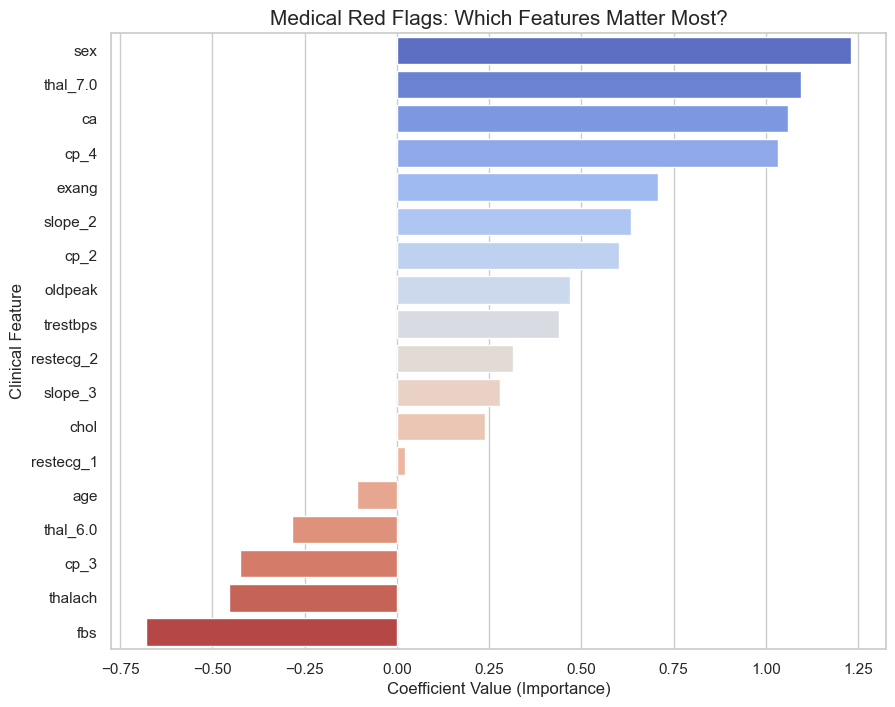

In [12]:
# This is the "aha!" moment for your portfolio. A recruiter or a doctor doesn't just want a prediction; 
# they want to know why the model made that choice. This is called Feature Importance.

# In Logistic Regression, we look at the Coefficients. A positive coefficient means that as that feature 
# increases, the risk of heart disease also increases.

# 1. Get the importance (coefficients) from the model
importance = model.coef_[0]
features = X_final.columns

# 2. Create a DataFrame for easy plotting
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# 3. Plot it
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')
plt.title('Medical Red Flags: Which Features Matter Most?', fontsize=15)
plt.xlabel('Coefficient Value (Importance)')
plt.ylabel('Clinical Feature')
plt.show()

Reading the "Red Flags
Top Positive Bars: Features like ca (number of major vessels colored) and oldpeak (ST depression) 
are likely at the top. This means as these values go up, the model is much more likely to predict heart disease.

Negative Bars: You might see thalach (max heart rate) with a negative bar. 
This confirms what we saw earlier: a lower max heart rate is actually a higher risk for heart disease.

Summary of Findings: "The model identified ca and oldpeak as the most significant predictors of heart disease, 
aligning with established cardiological research."

Model Performance: "The Logistic Regression model achieved an F1-score of [insert your score], 
providing a balanced approach between catching sick patients and avoiding false alarms."

Future Work: "In a real-world setting, I would explore more complex models like XGBoost or 
collect more diverse patient data to reduce False Negatives

C:\Users\user\AppData\Local\Temp\ipykernel_21740\2150924119.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')


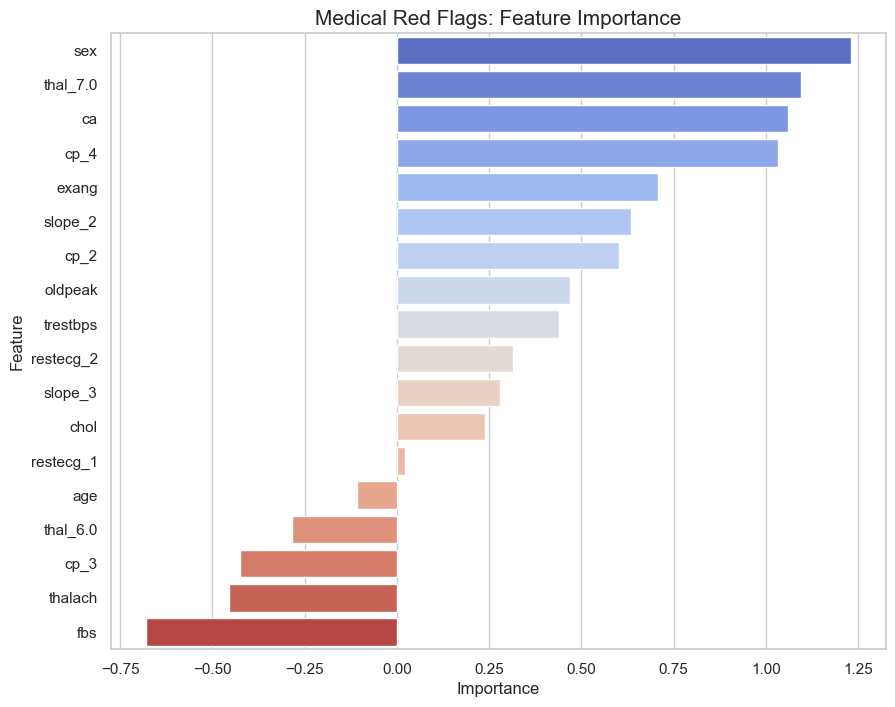

Chart saved to the 'portfolio_images' folder!


In [13]:
import os

# Create a folder for your portfolio assets
if not os.path.exists('portfolio_images'):
    os.makedirs('portfolio_images')

# Example: Re-running and saving the Feature Importance chart
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')
plt.title('Medical Red Flags: Feature Importance', fontsize=15)

# SAVE STEP: 
# dpi=300 makes it high-resolution for printing or high-quality screens
plt.savefig('portfolio_images/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved to the 'portfolio_images' folder!")

In [14]:
# Save the final encoded and scaled dataframe to a CSV file
df_encoded.to_csv('heart_disease_cleaned.csv', index=False)

print("Cleaned dataset saved as 'heart_disease_cleaned.csv'")

Cleaned dataset saved as 'heart_disease_cleaned.csv'
